## 导入模型

In [2]:
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model.logistic import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.naive_bayes import GaussianNB

import matplotlib.pyplot as plt
%matplotlib inline

## 用sklearn进行朴素贝叶斯

In [4]:
x, y = load_breast_cancer(return_X_y = True)

In [9]:
x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, test_size=0.2,
                                                   random_state=31 )
lgr = LogisticRegression()
nb = GaussianNB()
lgr_scores = []
nb_scores = []
train_sizes = range(10, len(x_train), 25)

In [10]:
for train_size in train_sizes:
    x_slice, _, y_slice, _, = train_test_split( x_train, y_train, 
                                               train_size = train_size,
                                              stratify = y_train,
                                              random_state = 31 )
    nb.fit(x_slice, y_slice)
    nb_scores.append( nb.score(x_test, y_test) )
    lgr.fit(x_slice, y_slice)
    lgr_scores.append( lgr.score(x_test, y_test) )

E:\miniconda\envs\course_py35\lib\site-packages\sklearn\model_selection\_split.py:2010: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


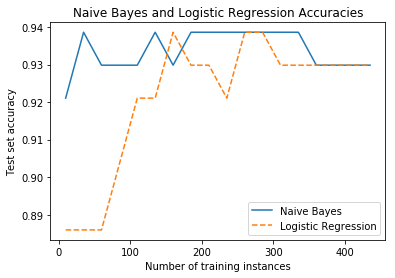

In [11]:
plt.plot( train_sizes, nb_scores, label='Naive Bayes' )
plt.plot( train_sizes, lgr_scores, linestyle='--', label='Logistic Regression')
plt.title( 'Naive Bayes and Logistic Regression Accuracies' )
plt.xlabel( 'Number of training instances' )
plt.ylabel( 'Test set accuracy' )
plt.legend()

In [ ]:
# 从上图能够得出训练集样本的数量对预测结果的影响：
# 贝叶斯模型变化不大，但是逻辑回归模型要从150以上才能发挥效果

In [12]:
df = pd.read_csv('E:\\MySQL_data\\pima-indians-diabetes.data.csv',
                header = None)

In [21]:
y = df[8]
x = df[list(range(8))]
x_train, x_test, y_train, y_test = train_test_split(x, y, 
                                                    stratify=y, random_state=11 )
lgr = LogisticRegression()
nb = GaussianNB()
lgr_scores = []
nb_scores = []
train_sizes = range(10, len(x_train), 10)

In [22]:
for train_size in train_sizes:
    x_slice, _, y_slice, _ = train_test_split( x_train, y_train, 
                                              train_size = train_size,
                                              random_state = 11 )
    nb.fit( x_slice, y_slice )
    nb_scores.append( nb.score( x_test, y_test ) )
    lgr.fit( x_slice, y_slice )
    lgr_scores.append( lgr.score( x_test, y_test ) )

E:\miniconda\envs\course_py35\lib\site-packages\sklearn\model_selection\_split.py:2010: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


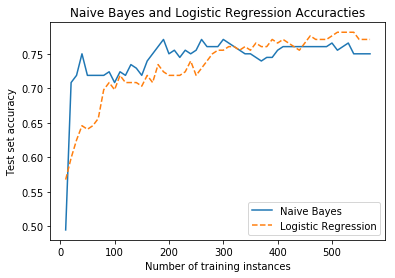

In [23]:
plt.plot( train_sizes, nb_scores, label = 'Naive Bayes')
plt.plot( train_sizes, lgr_scores, label = 'Logistic Regression', linestyle='--')
plt.title('Naive Bayes and Logistic Regression Accuracties')
plt.xlabel( 'Number of training instances' )
plt.ylabel( 'Test set accuracy' )
plt.legend()